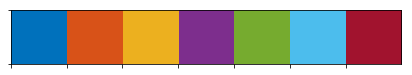

In [94]:
%matplotlib inline
import pickle, os, tqdm, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

label_fontsize=40
fontsize = 30
linewidth = 5
plt.rc('font',family='Times New Roman', size=fontsize)
plot_dict = {'markersize':15, 'markeredgewidth':5, 'linewidth':linewidth}
c2 = [[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980], [0.9290, 0.6940, 0.1250],[0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933], [0.635, 0.078, 0.184]]
sns.palplot(c2)
#np.random.shuffle(c)
m = ['+', 'o', 's', 'h', 'd', 'x', '*', 'p', '1', '2', '.']

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.02, 0.45)

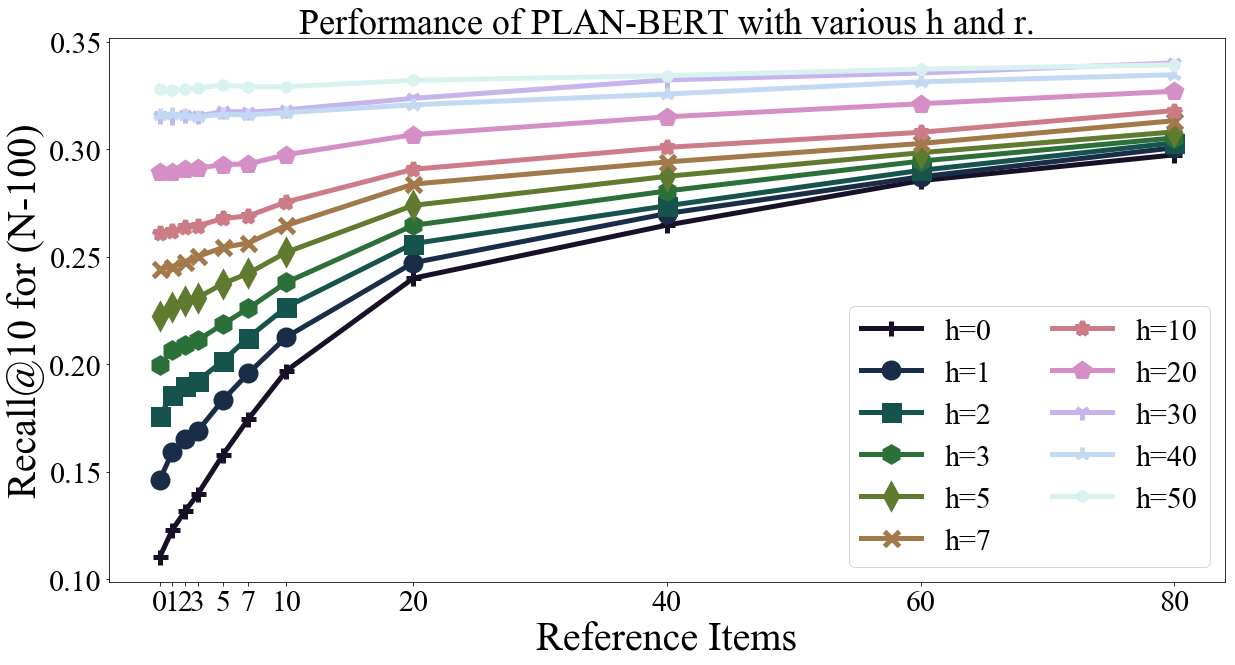

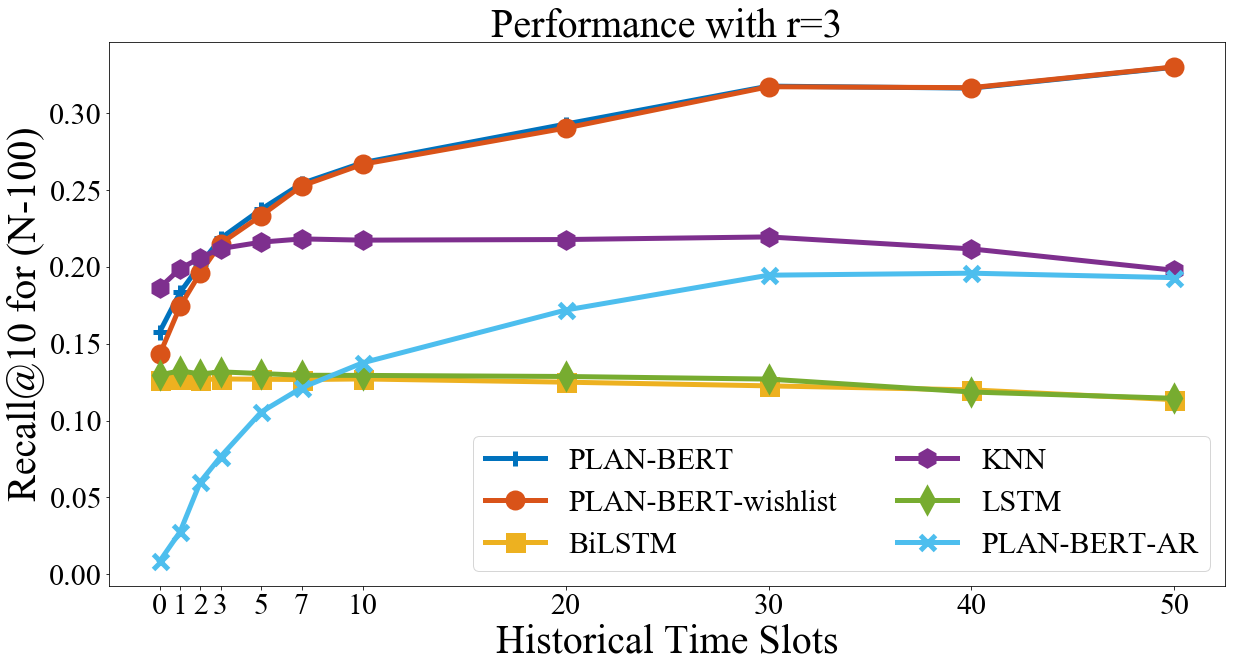

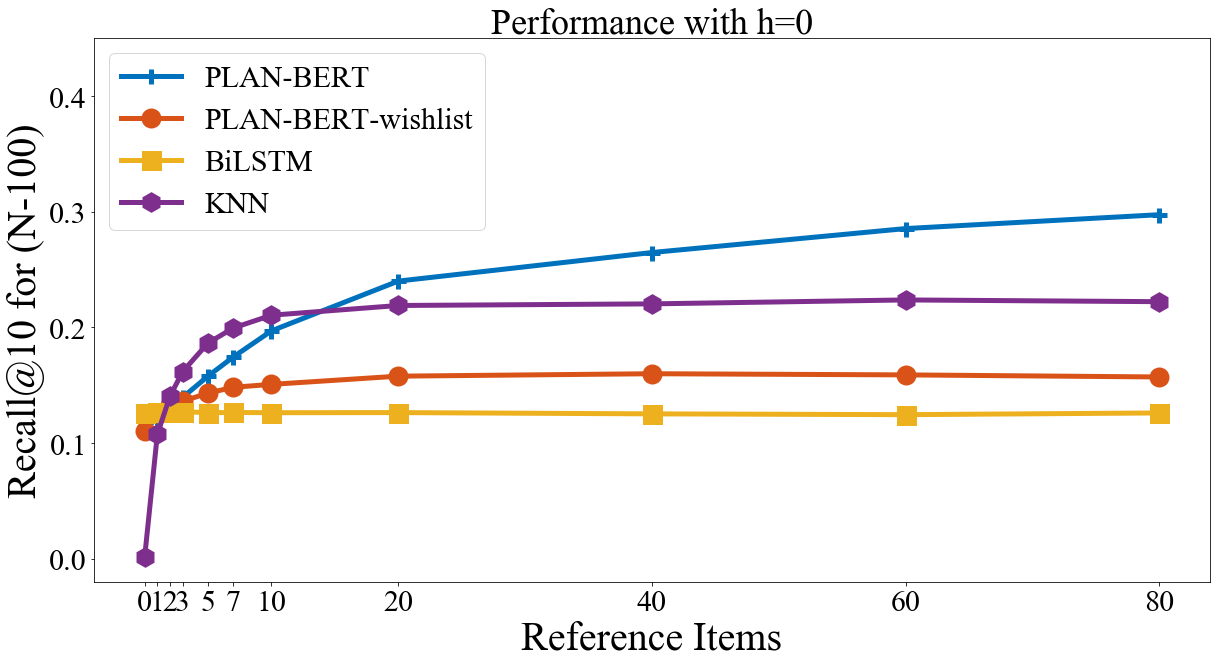

In [91]:
# Checkin

PLANBERT = '''0.1102	0.1229	0.1316	0.1395	0.1579	0.1745	0.197	0.24	0.2647	0.2854	0.2974
0.146	0.1592	0.1653	0.1689	0.1834	0.1958	0.2127	0.2472	0.2701	0.2872	0.3007
0.176	0.1857	0.1896	0.1922	0.2016	0.2124	0.2266	0.2561	0.2737	0.2902	0.303
0.1995	0.2064	0.2087	0.2112	0.2186	0.226	0.2381	0.2646	0.2806	0.2945	0.3053
0.2226	0.2267	0.2294	0.2309	0.2375	0.2423	0.2521	0.2739	0.2874	0.2984	0.3081
0.2441	0.2454	0.2477	0.2501	0.2543	0.2564	0.2646	0.2838	0.2941	0.3027	0.3133
0.2609	0.2619	0.264	0.2644	0.2678	0.269	0.2755	0.2907	0.3009	0.3079	0.318
0.2893	0.2896	0.2909	0.2912	0.2929	0.2932	0.2975	0.3068	0.3151	0.3212	0.327
0.3157	0.3152	0.3158	0.3154	0.3176	0.3173	0.3184	0.3237	0.3323	0.3355	0.3402
0.316	0.3162	0.3159	0.3151	0.3163	0.316	0.3171	0.3207	0.3257	0.3314	0.3347
0.3281	0.3276	0.3279	0.3286	0.3299	0.3291	0.3291	0.3321	0.3343	0.3373	0.3393'''
PLANBERT_wishlist = '''0.1102	0.1262	0.1328	0.1361	0.1432	0.1482	0.1507	0.1578	0.1599	0.1589	0.1571
0.146	0.1621	0.1662	0.167	0.1743	0.1782	0.1827	0.1849	0.1832	0.1772	0.1729
0.176	0.1881	0.1896	0.1893	0.1963	0.1979	0.2003	0.2016	0.1998	0.1952	0.1902
0.1995	0.2088	0.211	0.2111	0.2152	0.2158	0.2179	0.2177	0.2156	0.2104	0.2069
0.2226	0.2284	0.2302	0.2305	0.2334	0.2342	0.2321	0.2324	0.2304	0.2274	0.225
0.2441	0.2475	0.2491	0.2496	0.2527	0.2525	0.2529	0.2525	0.2488	0.2457	0.2432
0.2609	0.2637	0.2645	0.2643	0.2668	0.2661	0.2669	0.2654	0.2617	0.2596	0.2582
0.2893	0.29	0.2911	0.2905	0.2903	0.2912	0.2911	0.2909	0.2912	0.2888	0.2873
0.3157	0.3154	0.3159	0.3159	0.3172	0.317	0.3146	0.3142	0.3152	0.3142	0.3142
0.316	0.3155	0.3155	0.3154	0.3166	0.3163	0.3162	0.3162	0.317	0.318	0.3186
0.3281	0.3279	0.3286	0.3291	0.3301	0.3289	0.3284	0.3291	0.3301	0.3304	0.3296'''
BiLSTM = '''0.126	0.1271	0.1264	0.1271	0.1262	0.1264	0.1262	0.1263	0.1252	0.1245	0.126
0.1269	0.1271	0.1271	0.1273	0.1268	0.1269	0.1267	0.1267	0.1264	0.1261	0.1271
0.1265	0.1264	0.126	0.1266	0.1267	0.1263	0.1263	0.1259	0.1253	0.1267	0.1267
0.1276	0.1274	0.127	0.1275	0.1271	0.1268	0.127	0.127	0.1269	0.1269	0.1269
0.1272	0.1272	0.1267	0.127	0.1269	0.1268	0.1271	0.127	0.1267	0.1267	0.1263
0.1269	0.1267	0.1264	0.1265	0.1267	0.1267	0.1268	0.1267	0.1261	0.1258	0.1255
0.1277	0.128	0.1271	0.1274	0.1271	0.1274	0.127	0.1268	0.126	0.1254	0.1251
0.1256	0.1255	0.1251	0.1252	0.125	0.1247	0.1249	0.1246	0.124	0.124	0.1236
0.1229	0.1227	0.1227	0.1227	0.1226	0.1225	0.1222	0.1219	0.1218	0.1219	0.1217
0.1201	0.1201	0.12	0.12	0.12	0.12	0.1199	0.1197	0.1193	0.1192	0.1194
0.1133	0.1133	0.1136	0.1136	0.1136	0.1136	0.1136	0.1136	0.1133	0.1133	0.1133'''
KNN = '''0.0015	0.1075	0.1406	0.1618	0.1865	0.1995	0.2105	0.2189	0.2203	0.2237	0.2222
0.153	0.173	0.1799	0.1909	0.1988	0.2084	0.2141	0.2196	0.2194	0.2235	0.2223
0.1836	0.1926	0.1959	0.2001	0.206	0.2107	0.2151	0.2182	0.2188	0.2229	0.2216
0.2012	0.2047	0.2051	0.2087	0.2119	0.2142	0.2166	0.2182	0.2195	0.2228	0.2213
0.2088	0.2121	0.2132	0.2143	0.2161	0.2174	0.2188	0.22	0.2199	0.2218	0.2212
0.2137	0.2154	0.2167	0.2168	0.2182	0.2188	0.2193	0.221	0.2208	0.2224	0.2219
0.2154	0.2156	0.2157	0.2159	0.2174	0.218	0.2196	0.2202	0.2198	0.2212	0.221
0.2177	0.2172	0.2171	0.2174	0.2178	0.2182	0.2188	0.2186	0.2192	0.2209	0.222
0.2191	0.2194	0.2193	0.2195	0.2195	0.2196	0.2204	0.2209	0.2203	0.221	0.2217
0.2119	0.2119	0.212	0.2118	0.2117	0.2117	0.2121	0.2128	0.2122	0.2121	0.2126
0.1978	0.1978	0.1978	0.1978	0.1978	0.1978	0.1978	0.1976	0.1968	0.1966	0.1973'''
LSTM = '''0.1297
0.1324
0.1303
0.1317
0.1306
0.1295
0.1294
0.1287
0.127
0.1186
0.1145'''
ARDist = '''0.0086
0.0277
0.0602
0.0766
0.1056
0.1214
0.1376
0.1719
0.1946
0.1959
0.193'''

r_list = [0,1,2,3,5,7,10] + list(range(20, 81, 20))
h_list = [0,1,2,3,5,7] + list(range(10, 51, 10))

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
c = sns.color_palette("cubehelix", PLANBERT.shape[0])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with various h and r.')
ax = fig.add_subplot(111)
for iter in range(PLANBERT.shape[0]):
    ax.plot(r_list, PLANBERT[iter], marker=m[iter], color=c[iter], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['h={}'.format(iter) for iter in h_list], fontsize=fontsize,  ncol=2, loc='best')



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3', fontsize=label_fontsize)
ax = fig.add_subplot(111)
ax.plot(h_list, PLANBERT[:, 4], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(h_list, PLANBERT_wishlist[:, 4], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(h_list, BiLSTM[:, 4], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(h_list, KNN[:, 4], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
ax.plot(h_list, LSTM, marker=m[4], c=c2[4], linestyle='-', **plot_dict)
ax.plot(h_list, ARDist, marker=m[5], c=c2[5], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Historical Time Slots', fontsize=label_fontsize)
ax.xaxis.set_ticks(h_list)
ax.xaxis.set_ticklabels(h_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'PLAN-BERT-AR'], fontsize=fontsize,  ncol=2, loc='best')
#plt.ylim([0.05, 0.52])



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(r_list, PLANBERT[0], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(r_list, PLANBERT_wishlist[0], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(r_list, BiLSTM[0], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(r_list, KNN[0], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN'], fontsize=30,  ncol=1, loc='best')
plt.ylim([-0.02, 0.45])

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


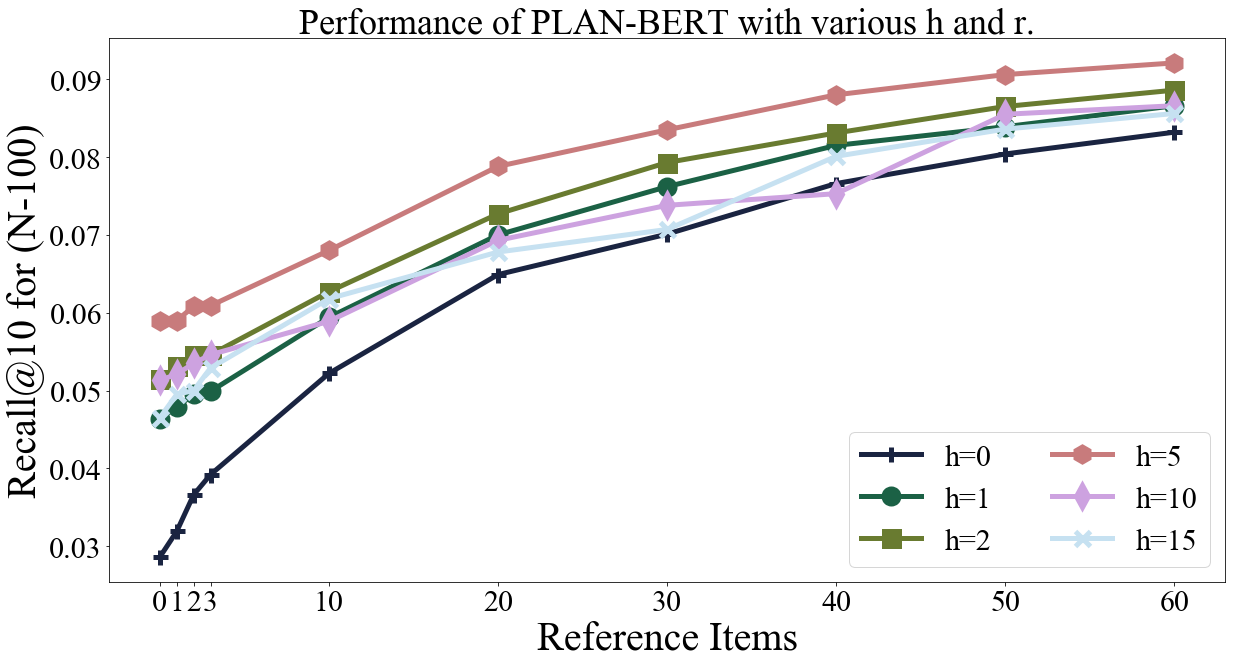

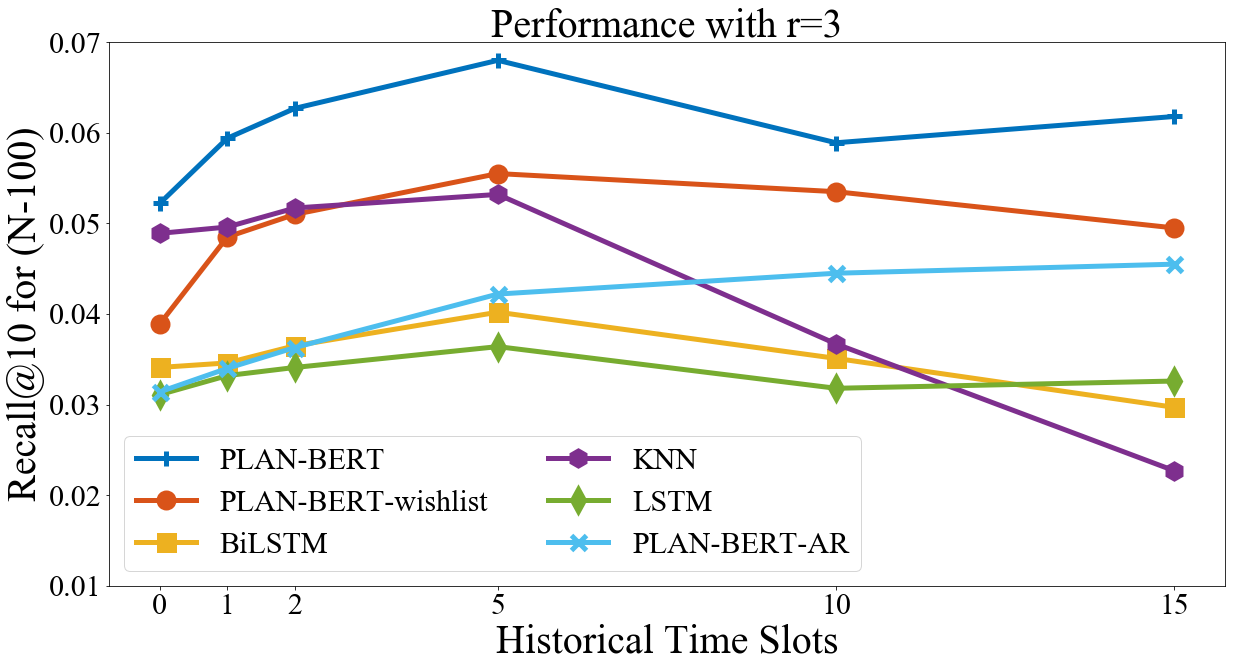

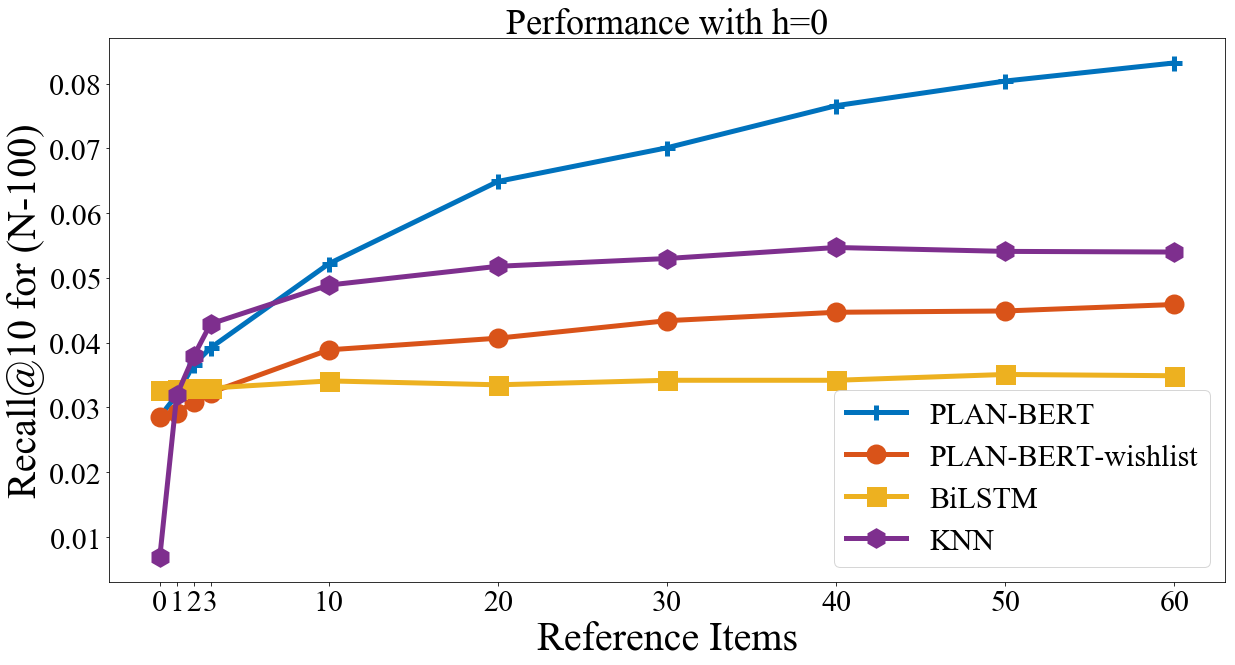

In [87]:
# UKRetail

PLANBERT = '''0.0286	0.0319	0.0366	0.0392	0.0522	0.0649	0.0701	0.0766	0.0804	0.0832
0.0464	0.0479	0.0495	0.0499	0.0594	0.07	0.0762	0.0815	0.0839	0.0866
0.0515	0.0531	0.0546	0.0546	0.0627	0.0727	0.0793	0.0831	0.0865	0.0886
0.0589	0.059	0.0608	0.0609	0.068	0.0788	0.0835	0.088	0.0906	0.0921
0.0513	0.0521	0.0535	0.0546	0.0589	0.0693	0.0738	0.0753	0.0855	0.0866
0.0465	0.0495	0.05	0.0529	0.0618	0.0678	0.0707	0.0801	0.0836	0.0856'''
PLANBERT_wishlist = '''0.0286	0.0292	0.0308	0.0323	0.0389	0.0407	0.0434	0.0447	0.0449	0.0459
0.0464	0.0471	0.0467	0.0466	0.0485	0.0494	0.0507	0.0516	0.0528	0.0533
0.0515	0.0534	0.0531	0.0516	0.051	0.0508	0.052	0.0551	0.0536	0.0541
0.0589	0.0569	0.0561	0.0556	0.0555	0.0554	0.0568	0.0575	0.0572	0.0572
0.0513	0.0501	0.0494	0.0496	0.0535	0.0529	0.0546	0.0552	0.0589	0.0613
0.0465	0.0475	0.0455	0.0465	0.0495	0.0514	0.0559	0.0574	0.0584	0.0584'''
BiLSTM = '''0.0327	0.0329	0.033	0.033	0.0341	0.0335	0.0342	0.0342	0.0351	0.0349
0.0343	0.0342	0.0343	0.0343	0.0346	0.0347	0.0349	0.0351	0.0358	0.0352
0.0364	0.0363	0.0359	0.0364	0.0365	0.0364	0.037	0.037	0.0369	0.0368
0.0401	0.04	0.04	0.0399	0.0402	0.0404	0.0401	0.0404	0.04	0.0399
0.034	0.0341	0.0343	0.0341	0.0351	0.0353	0.0355	0.0357	0.0355	0.0355
0.0292	0.0292	0.0292	0.0292	0.0297	0.0307	0.0307	0.0307	0.0307	0.0312'''
KNN = '''0.0069	0.0319	0.0379	0.0429	0.0489	0.0518	0.053	0.0547	0.0541	0.054
0.0471	0.0469	0.0479	0.0484	0.0496	0.0511	0.0523	0.053	0.0531	0.0532
0.0498	0.0501	0.0504	0.0508	0.0517	0.0525	0.0531	0.0538	0.0543	0.054
0.0534	0.0533	0.0534	0.0532	0.0532	0.0525	0.0538	0.0535	0.053	0.0529
0.0371	0.0373	0.0369	0.0369	0.0367	0.0371	0.0379	0.0379	0.0369	0.0367
0.0237	0.0237	0.0242	0.0242	0.0227	0.0223	0.0223	0.0227	0.0237	0.0237'''
LSTM = '''0.0311
0.0332
0.0341
0.0364
0.0318
0.0326'''
ARDist = '''0.0314
0.034
0.0363
0.0422
0.0445
0.0455'''

r_list = [0,1,2,3,10,20,30,40,50,60]
h_list = [0,1,2,5,10,15]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
c = sns.color_palette("cubehelix", PLANBERT.shape[0])


fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with various h and r.')
ax = fig.add_subplot(111)
for iter in range(PLANBERT.shape[0]):
    ax.plot(r_list, PLANBERT[iter], marker=m[iter], color=c[iter], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['h={}'.format(iter) for iter in h_list], fontsize=fontsize,  ncol=2, loc='best')



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3', fontsize=label_fontsize)
ax = fig.add_subplot(111)
ax.plot(h_list, PLANBERT[:, 4], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(h_list, PLANBERT_wishlist[:, 4], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(h_list, BiLSTM[:, 4], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(h_list, KNN[:, 4], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
ax.plot(h_list, LSTM, marker=m[4], c=c2[4], linestyle='-', **plot_dict)
ax.plot(h_list, ARDist, marker=m[5], c=c2[5], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Historical Time Slots', fontsize=label_fontsize)
ax.xaxis.set_ticks(h_list)
ax.xaxis.set_ticklabels(h_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'PLAN-BERT-AR'], fontsize=fontsize,  ncol=2, loc='best')
plt.ylim([0.01, 0.07])



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(r_list, PLANBERT[0], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(r_list, PLANBERT_wishlist[0], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(r_list, BiLSTM[0], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(r_list, KNN[0], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN'], fontsize=30,  ncol=1, loc='best')
#plt.ylim([-0.02, 0.45])

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


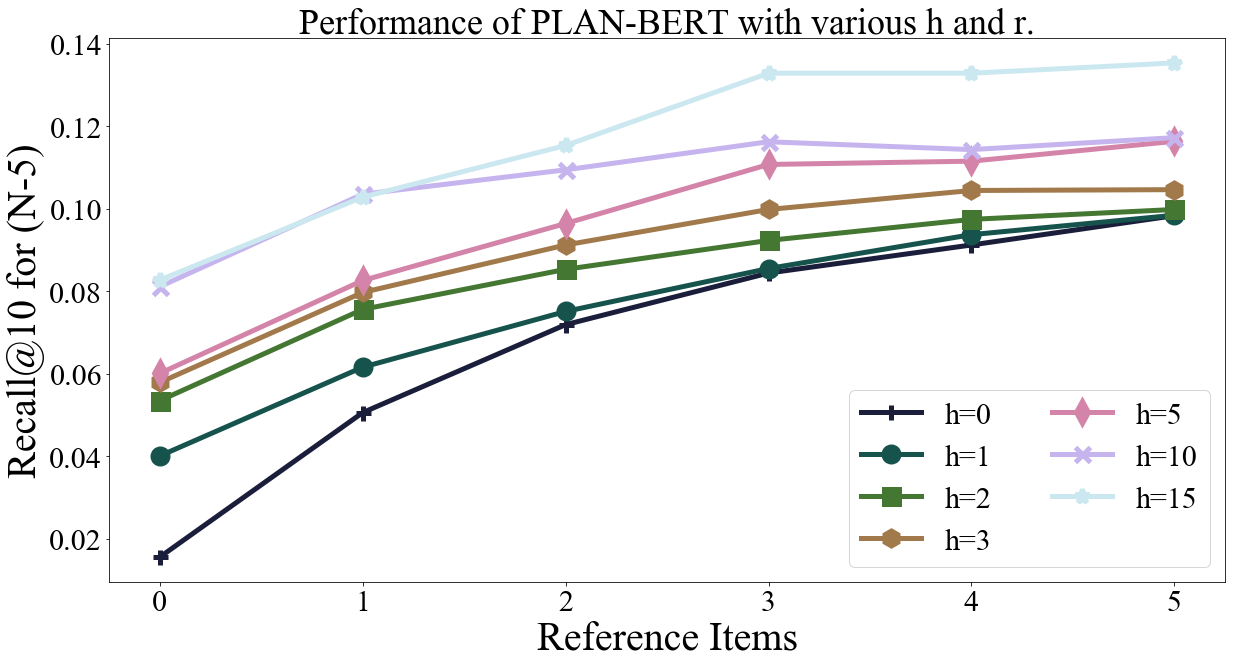

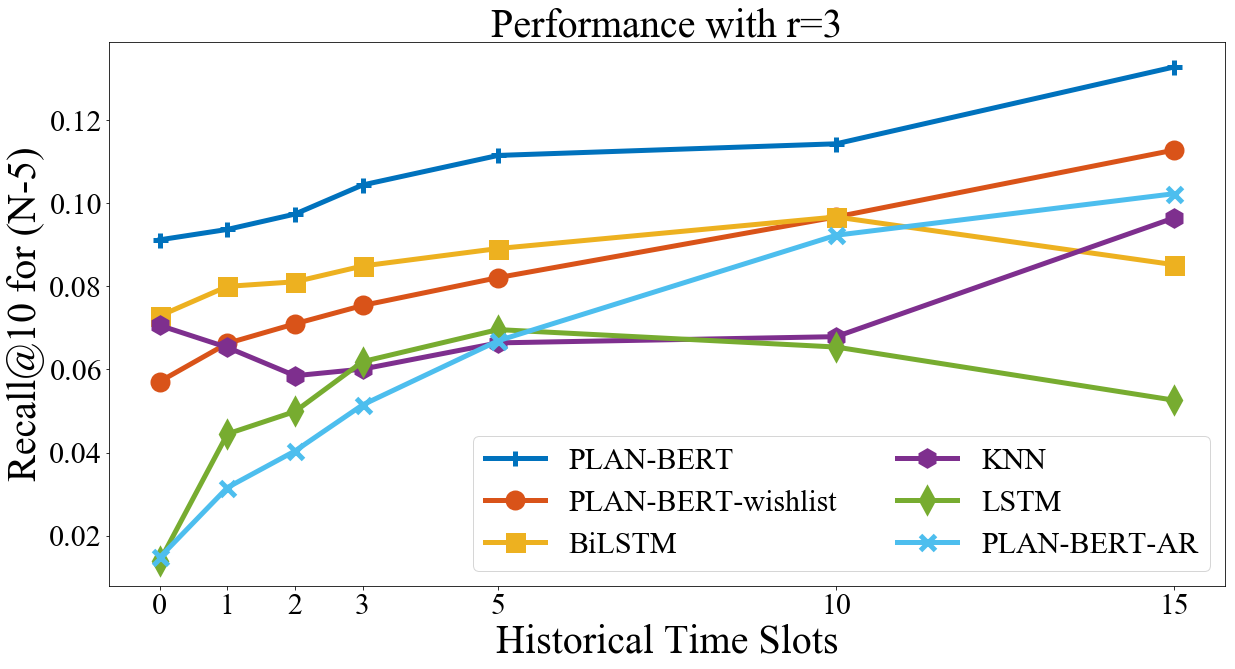

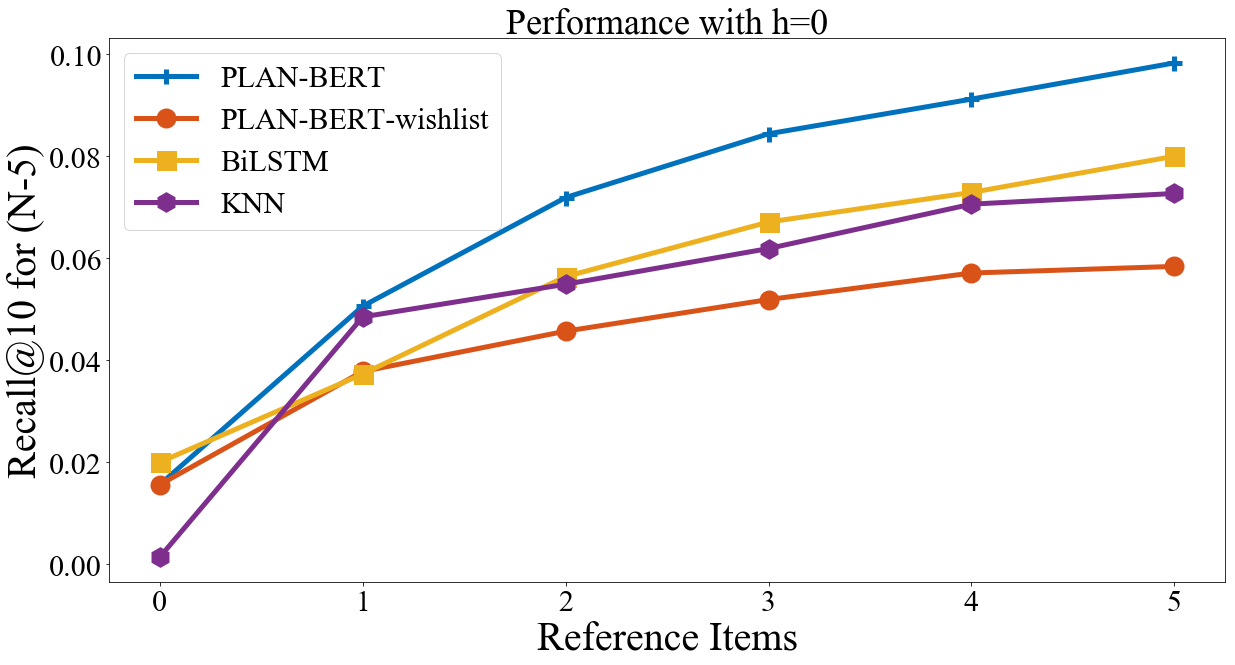

In [97]:
# Amazon Rating

PLANBERT = '''0.0156	0.0506	0.0719	0.0844	0.0912	0.0983
0.0401	0.0616	0.0751	0.0855	0.0937	0.0984
0.0535	0.0756	0.0853	0.0923	0.0974	0.0998
0.0579	0.0797	0.0912	0.0998	0.1044	0.1046
0.0601	0.0826	0.0964	0.1107	0.1115	0.1163
0.0811	0.1035	0.1094	0.1162	0.1143	0.1172
0.0827	0.1028	0.1153	0.1328	0.1328	0.1353'''
PLANBERT_wishlist = '''0.0156	0.0378	0.0457	0.0519	0.0571	0.0584
0.0401	0.0536	0.0583	0.061	0.0663	0.0661
0.0535	0.0647	0.0649	0.0661	0.071	0.0729
0.0579	0.0679	0.0708	0.0685	0.0754	0.0745
0.0601	0.0657	0.0696	0.0709	0.0821	0.0839
0.0811	0.083	0.0938	0.0928	0.0967	0.0977
0.0827	0.1003	0.1028	0.1128	0.1128	0.1128'''
BiLSTM = '''0.02	0.0373	0.0564	0.0671	0.0729	0.08
0.0418	0.0591	0.068	0.0802	0.08	0.0834
0.0574	0.0664	0.0729	0.0787	0.0811	0.0823
0.0602	0.0679	0.0774	0.0826	0.0849	0.0894
0.0592	0.0661	0.0744	0.0834	0.0891	0.0942
0.0684	0.0752	0.0771	0.0928	0.0967	0.0977
0.0777	0.0827	0.0852	0.0877	0.0852	0.0877'''
KNN = '''0.0014	0.0485	0.0549	0.0619	0.0706	0.0727
0.0359	0.0501	0.0539	0.0607	0.0653	0.067
0.0415	0.0482	0.0515	0.0566	0.0585	0.0599
0.0491	0.0533	0.0522	0.0581	0.0601	0.0615
0.0518	0.0557	0.0566	0.0613	0.0664	0.0681
0.0582	0.0601	0.066	0.065	0.0679	0.0679
0.0941	0.0916	0.0941	0.0965	0.0965	0.0965'''
LSTM = '''0.0139
0.0445
0.0499
0.0619
0.0696
0.0654
0.0526'''
ARDist = '''0.0148
0.0316
0.0404
0.0515
0.0669
0.0923
0.1023'''

r_list = [0,1,2,3,4,5]
h_list = [0,1,2,3,5,10,15]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
c = sns.color_palette("cubehelix", PLANBERT.shape[0])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with various h and r.')
ax = fig.add_subplot(111)
for iter in range(PLANBERT.shape[0]):
    ax.plot(r_list, PLANBERT[iter], marker=m[iter], color=c[iter], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-5)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['h={}'.format(iter) for iter in h_list], fontsize=fontsize,  ncol=2, loc='best')



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3', fontsize=label_fontsize)
ax = fig.add_subplot(111)
ax.plot(h_list, PLANBERT[:, 4], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(h_list, PLANBERT_wishlist[:, 4], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(h_list, BiLSTM[:, 4], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(h_list, KNN[:, 4], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
ax.plot(h_list, LSTM, marker=m[4], c=c2[4], linestyle='-', **plot_dict)
ax.plot(h_list, ARDist, marker=m[5], c=c2[5], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-5)', fontsize=label_fontsize)
plt.xlabel('Historical Time Slots', fontsize=label_fontsize)
ax.xaxis.set_ticks(h_list)
ax.xaxis.set_ticklabels(h_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'PLAN-BERT-AR'], fontsize=fontsize,  ncol=2, loc='best')
#plt.ylim([0.05, 0.52])



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(r_list, PLANBERT[0], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(r_list, PLANBERT_wishlist[0], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(r_list, BiLSTM[0], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(r_list, KNN[0], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-5)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN'], fontsize=30,  ncol=1, loc='best')
#plt.ylim([-0.02, 0.45])

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


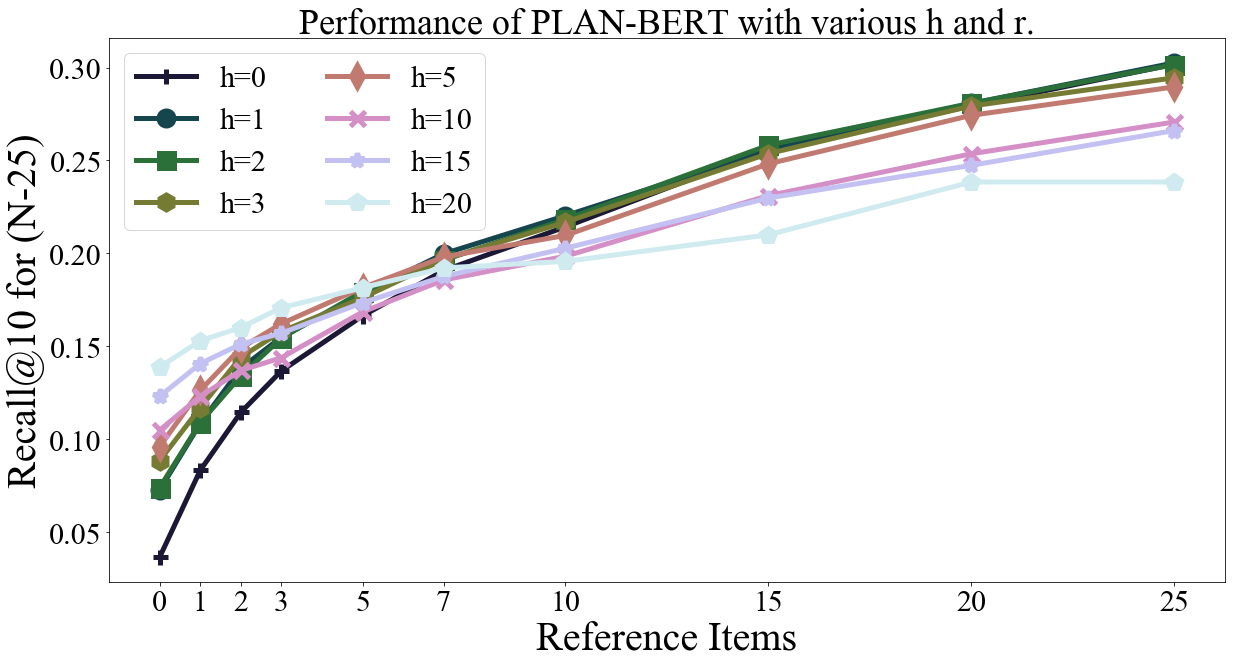

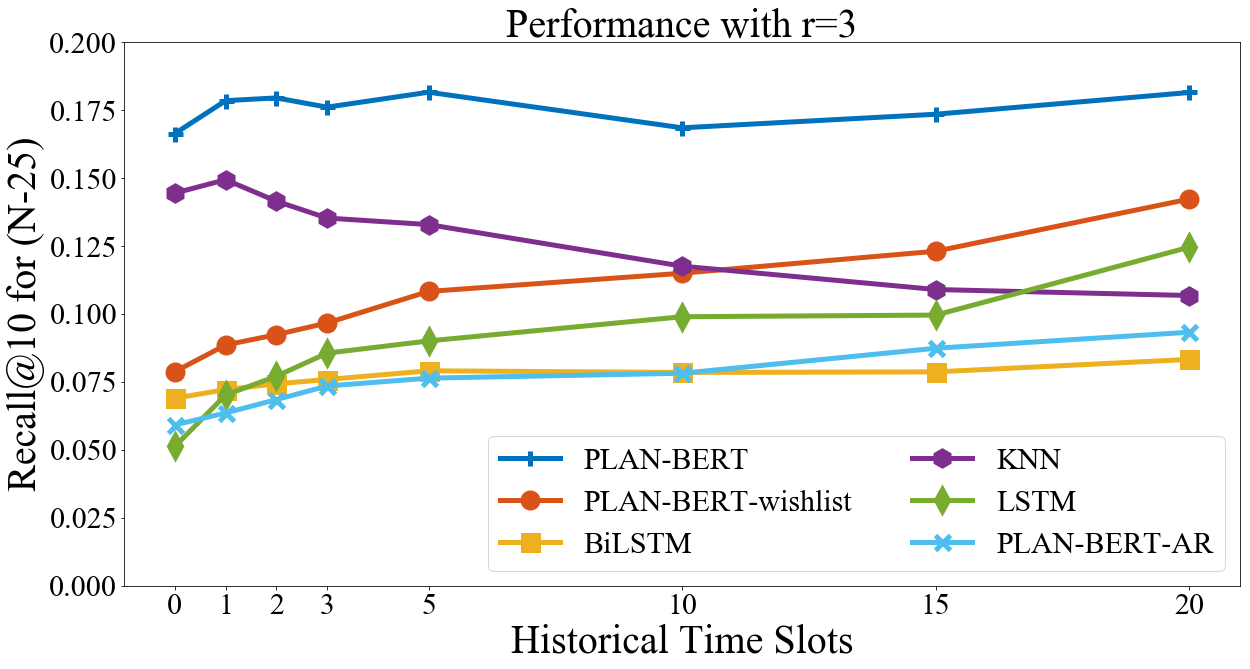

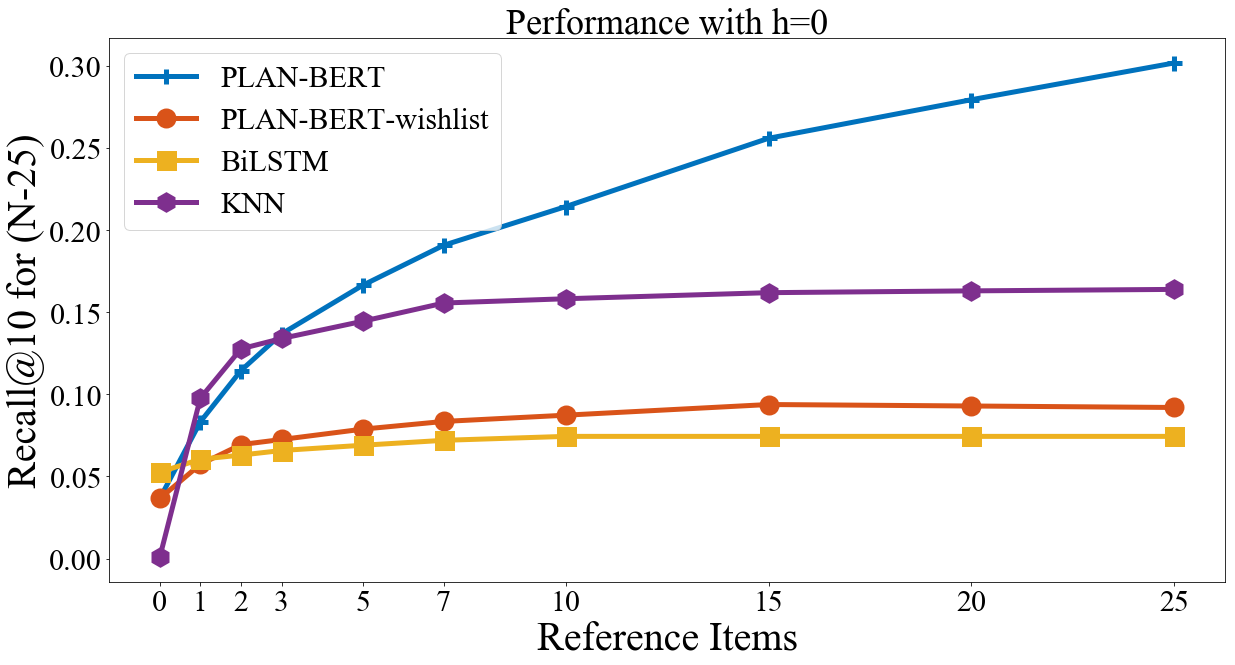

In [100]:
# Taobao

PLANBERT = '''0.0366	0.0833	0.1145	0.1368	0.1664	0.1908	0.2143	0.2559	0.2794	0.3018
0.0727	0.1085	0.1382	0.1549	0.1785	0.1998	0.2203	0.2554	0.2807	0.3025
0.074	0.109	0.1341	0.1545	0.1795	0.1964	0.2183	0.2582	0.2808	0.3016
0.0885	0.117	0.1442	0.158	0.1761	0.1968	0.2168	0.2537	0.2793	0.2945
0.0961	0.1263	0.1491	0.1622	0.1816	0.1981	0.2097	0.2482	0.2743	0.2896
0.1049	0.1231	0.137	0.1439	0.1685	0.1857	0.1985	0.2311	0.2536	0.2707
0.1231	0.1407	0.1512	0.1571	0.1735	0.1876	0.2028	0.2298	0.2474	0.2661
0.1388	0.153	0.1601	0.1708	0.1815	0.1922	0.1957	0.21	0.2384	0.2384'''
PLANBERT_wishlist = '''0.0366	0.0574	0.0694	0.0725	0.0788	0.0835	0.0873	0.0938	0.0929	0.092
0.0727	0.0818	0.0881	0.09	0.0886	0.0873	0.0929	0.0945	0.0923	0.0888
0.074	0.0836	0.0882	0.0906	0.0924	0.0929	0.092	0.0995	0.0946	0.0962
0.0885	0.0933	0.0972	0.0943	0.0967	0.0974	0.1008	0.1037	0.1018	0.1023
0.0961	0.1028	0.108	0.1072	0.1083	0.1077	0.1106	0.1132	0.1121	0.1069
0.1049	0.1091	0.1113	0.1129	0.115	0.1156	0.1161	0.1247	0.1231	0.1199
0.1231	0.1254	0.1243	0.1266	0.1231	0.1325	0.129	0.136	0.1419	0.143
0.1388	0.1388	0.1423	0.1423	0.1423	0.1388	0.1388	0.1352	0.1388	0.1281'''
BiLSTM = '''0.0526	0.0605	0.063	0.0658	0.069	0.072	0.0744	0.0744	0.0744	0.0744
0.0604	0.064	0.0656	0.0667	0.0722	0.0741	0.0762	0.0762	0.0762	0.0762
0.0682	0.0698	0.0715	0.0718	0.0743	0.075	0.0764	0.0764	0.0764	0.0764
0.0692	0.0704	0.0722	0.072	0.0759	0.0766	0.0794	0.0794	0.0794	0.0794
0.0729	0.0741	0.0752	0.0768	0.0791	0.0796	0.0797	0.0797	0.0797	0.0797
0.0767	0.0762	0.0785	0.0782	0.0785	0.0797	0.0802	0.0802	0.0802	0.0802
0.075	0.0756	0.0763	0.0763	0.0787	0.0794	0.0775	0.0775	0.0775	0.0775
0.0813	0.0813	0.0833	0.0853	0.0833	0.0833	0.0833	0.0833	0.0833	0.0833'''
KNN = '''0.0009	0.0977	0.1277	0.134	0.1445	0.1556	0.1582	0.1619	0.163	0.1639
0.0744	0.1118	0.1301	0.1391	0.1494	0.1541	0.1543	0.1559	0.1564	0.1586
0.0858	0.1108	0.124	0.1304	0.1415	0.147	0.1479	0.1497	0.1523	0.1543
0.1023	0.116	0.1261	0.1307	0.1353	0.1418	0.1413	0.1458	0.1495	0.1511
0.1112	0.1188	0.124	0.1303	0.1329	0.1358	0.1378	0.1419	0.1419	0.1442
0.1128	0.1155	0.1155	0.1144	0.1176	0.1235	0.1225	0.1267	0.1273	0.1278
0.1032	0.1067	0.1079	0.1079	0.109	0.109	0.1055	0.1055	0.1043	0.1055
0.1068	0.1068	0.1068	0.1068	0.1068	0.1068	0.1068	0.1068	0.1068	0.1068'''
LSTM = '''0.0513
0.0702
0.0771
0.0856
0.0901
0.099
0.0996
0.1246'''
ARDist = '''0.0592
0.0636
0.0685
0.0735
0.0764
0.0782
0.0874
0.0933'''

r_list = [0,1,2,3,5,7,10,15,20,25]
h_list = [0,1,2,3,5,10,15,20]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
c = sns.color_palette("cubehelix", PLANBERT.shape[0])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with various h and r.')
ax = fig.add_subplot(111)
for iter in range(PLANBERT.shape[0]):
    ax.plot(r_list, PLANBERT[iter], marker=m[iter], color=c[iter], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-25)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['h={}'.format(iter) for iter in h_list], fontsize=fontsize,  ncol=2, loc='best')



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3', fontsize=label_fontsize)
ax = fig.add_subplot(111)
ax.plot(h_list, PLANBERT[:, 4], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(h_list, PLANBERT_wishlist[:, 4], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(h_list, BiLSTM[:, 4], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(h_list, KNN[:, 4], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
ax.plot(h_list, LSTM, marker=m[4], c=c2[4], linestyle='-', **plot_dict)
ax.plot(h_list, ARDist, marker=m[5], c=c2[5], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-25)', fontsize=label_fontsize)
plt.xlabel('Historical Time Slots', fontsize=label_fontsize)
ax.xaxis.set_ticks(h_list)
ax.xaxis.set_ticklabels(h_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'PLAN-BERT-AR'], fontsize=fontsize,  ncol=2, loc='best')
plt.ylim([0.00, 0.20])



fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(r_list, PLANBERT[0], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(r_list, PLANBERT_wishlist[0], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(r_list, BiLSTM[0], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(r_list, KNN[0], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-25)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN'], fontsize=30,  ncol=1, loc='best')
#plt.ylim([-0.02, 0.45])

In [ ]:
# Checkin

PLANBERT = '''0.0192	0.0416	0.0578	0.0636	0.0709	0.0699
0.0305	0.0427	0.0591	0.0596	0.0674	0.0691
0.0376	0.0427	0.0548	0.0583	0.0656	0.0674
0.0426	0.049	0.0632	0.0659	0.0735	0.0742
0.0611	0.0684	0.0806	0.093	0.0938	0.0946
0.097	0.1023	0.1078	0.1258	0.1364	0.132
0.1279	0.124	0.1261	0.1339	0.1339	0.1621'''
PLANBERT_wishlist = '''0.0188	0.0325	0.0425	0.0448	0.0509	0.0495
0.0291	0.0365	0.044	0.0442	0.0519	0.0527
0.0382	0.0387	0.0451	0.0447	0.047	0.0492
0.0422	0.0433	0.049	0.0508	0.0589	0.0581
0.0598	0.0634	0.0681	0.0711	0.0711	0.0645
0.0858	0.0891	0.0904	0.0914	0.0877	0.0875
0.1287	0.1307	0.1307	0.139	0.139	0.1599'''
BiLSTM = '''0.0279	0.0431	0.0518	0.0564	0.0576	0.0594
0.0327	0.0419	0.0482	0.0521	0.0559	0.0566
0.0432	0.0463	0.0484	0.0496	0.0531	0.0532
0.0486	0.0515	0.0533	0.0568	0.059	0.06
0.0562	0.0589	0.0589	0.064	0.0709	0.0701
0.0644	0.0674	0.0682	0.0713	0.0764	0.078
0.101	0.0987	0.0987	0.1047	0.103	0.103'''
KNN = '''0.0019	0.0338	0.0452	0.0527	0.0563	0.0565
0.0255	0.0318	0.0414	0.0453	0.0495	0.0492
0.027	0.0274	0.0366	0.039	0.0431	0.0433
0.0326	0.0321	0.0365	0.0391	0.0433	0.0432
0.0433	0.0419	0.045	0.0485	0.0517	0.0512
0.0444	0.0479	0.0484	0.049	0.051	0.0523
0.085	0.0862	0.0862	0.0862	0.0862	0.0839'''
LSTM = '''0.0243
0.0245
0.0224
0.0263
0.0354
0.0358
0.0486'''
ARDist = '''0.0181
0.023
0.0289
0.0418
0.0585
0.09
0.1065'''
ARTopN = '''0.0026
0.0096
0.0077
0.0141
0.0269
0.0541
0.057'''

r_list = [0,1,2,3,4,5]
h_list = [0,1,2,3,5,10,15]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
ARTopN = np.array([[float(y) for y in x.split('\t')] for x in ARTopN.split('\n')])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3')
ax = fig.add_subplot(111)

ax.plot(PLANBERT[:, 4], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[:, 4], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[:, 4], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[:, 4], marker='s', linestyle='-', **plot_dict)
ax.plot(LSTM, marker='d', linestyle='-', **plot_dict)
ax.plot(ARDist, marker='+', linestyle='-', **plot_dict)
ax.plot(ARTopN, marker='*', linestyle='-', **plot_dict)
    
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Historical Time Slots')

ax.xaxis.set_ticks(np.arange(PLANBERT.shape[0]))
ax.xaxis.set_ticklabels(h_list, fontsize=30)

ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.15])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(PLANBERT[0], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[0], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[0], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[0], marker='s', linestyle='-', **plot_dict)
ax.plot([0,len(r_list)-1], [LSTM[0], LSTM[0]], marker='d', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARDist[0], ARDist[0]], marker='+', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARTopN[0], ARTopN[0]], marker='*', linestyle='--', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=3, loc='best')
plt.ylim([0.00, 0.12])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with different historical time slots.')
ax = fig.add_subplot(111)
for line in PLANBERT[:8]:
    ax.plot(line, marker='x', linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['h={}'.format(iter) for iter in h_list[:8]], fontsize=30,  ncol=3, loc='best')
plt.ylim([0.00, 0.20])

/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments 

(0.0, 0.3)

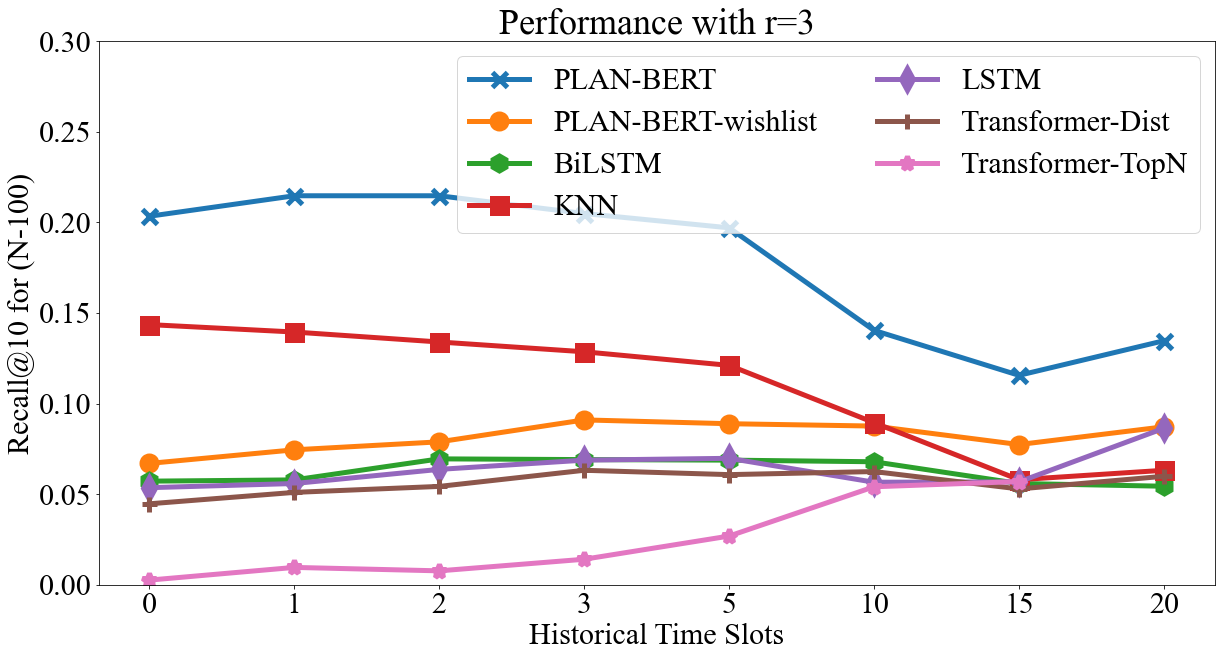

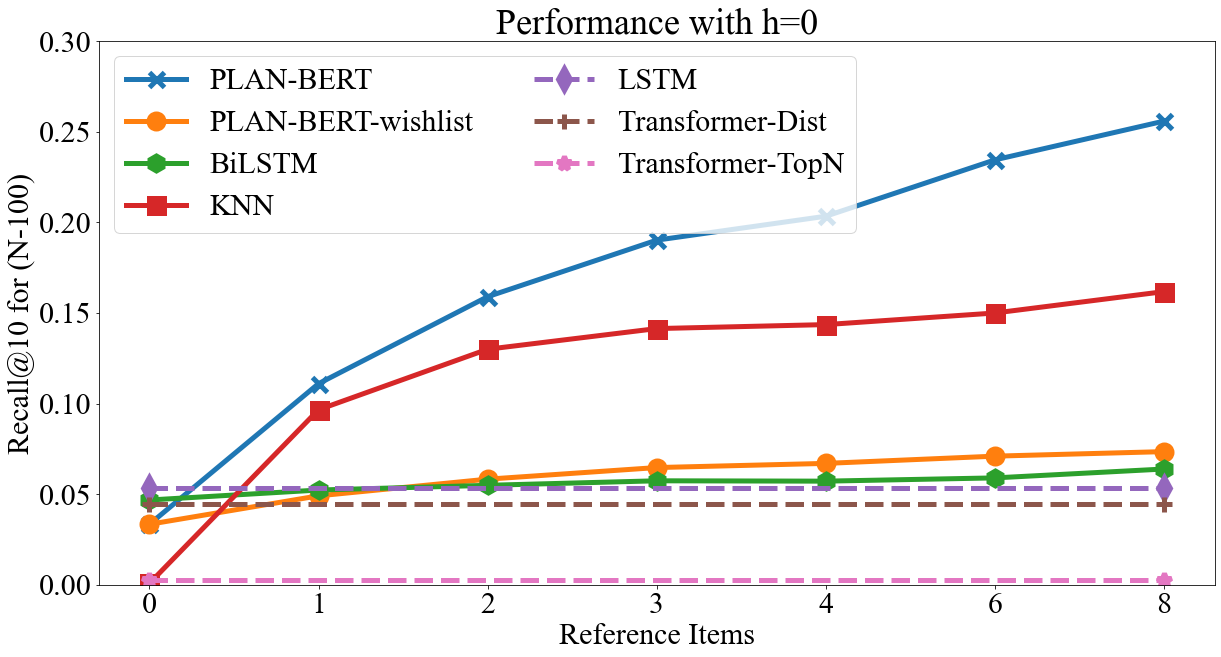

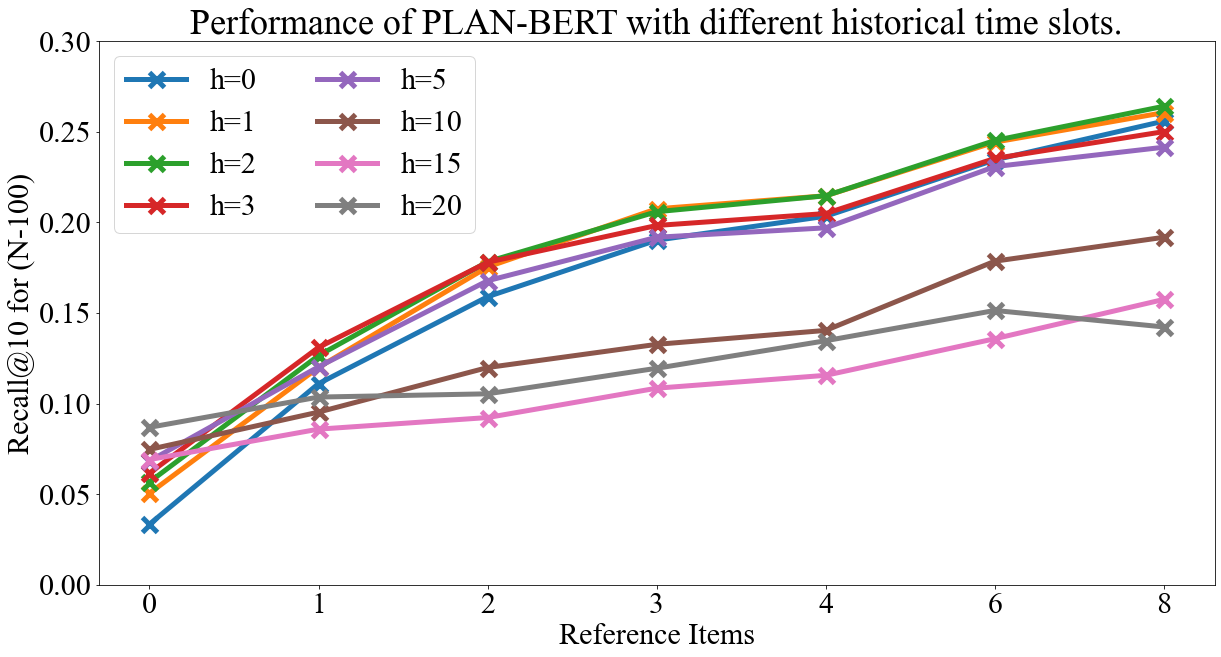

In [66]:
# Checkin

PLANBERT = '''0.0334	0.111	0.159	0.1902	0.2034	0.2345	0.2559
0.0505	0.12	0.1754	0.2075	0.2147	0.2443	0.2606
0.0567	0.1265	0.1783	0.2059	0.2147	0.2452	0.2641
0.0616	0.131	0.178	0.1983	0.2049	0.2353	0.2501
0.0683	0.1203	0.1678	0.1918	0.197	0.2308	0.2415
0.0747	0.0953	0.1199	0.1327	0.1404	0.1786	0.1918
0.0691	0.0859	0.0923	0.1085	0.1156	0.1358	0.1575
0.0869	0.1036	0.1054	0.1195	0.1347	0.1514	0.1423'''
PLANBERT_wishlist = '''0.0334	0.0491	0.0583	0.0647	0.067	0.071	0.0735
0.0505	0.0627	0.0718	0.0742	0.0745	0.0786	0.0784
0.0567	0.0692	0.0743	0.0784	0.0789	0.0788	0.0769
0.0616	0.079	0.0857	0.0891	0.091	0.0906	0.0944
0.0683	0.0752	0.08	0.0828	0.0889	0.0908	0.0927
0.0747	0.0788	0.0834	0.0856	0.0876	0.0873	0.0981
0.0691	0.0717	0.0724	0.0774	0.0774	0.0738	0.0799
0.0869	0.0876	0.0872	0.0872	0.0872	0.074	0.0771'''
BiLSTM = '''0.0468	0.0523	0.0549	0.0574	0.0572	0.059	0.0639
0.0512	0.0539	0.0546	0.056	0.0579	0.0608	0.068
0.0607	0.0614	0.0616	0.0661	0.0695	0.0718	0.0692
0.0625	0.0646	0.0662	0.0694	0.0691	0.0702	0.074
0.0611	0.062	0.065	0.0681	0.0688	0.0688	0.0686
0.0658	0.0662	0.066	0.0677	0.0679	0.0688	0.0692
0.0554	0.0554	0.0554	0.0559	0.0559	0.0559	0.0555
0.0544	0.0544	0.0544	0.0544	0.0544	0.0544	0.0544'''
KNN = '''0.0008	0.0966	0.13	0.1414	0.1436	0.15	0.1618
0.0506	0.0962	0.1211	0.1357	0.1395	0.1436	0.1521
0.062	0.0939	0.1141	0.1261	0.134	0.1363	0.1446
0.0785	0.1025	0.1168	0.1241	0.1286	0.1277	0.1366
0.0822	0.0964	0.1086	0.1178	0.1211	0.1206	0.1213
0.0807	0.0863	0.0863	0.0862	0.0895	0.0908	0.0925
0.0574	0.0581	0.0582	0.0582	0.058	0.0567	0.0557
0.0632	0.0632	0.0632	0.0632	0.0632	0.0632	0.0632'''
LSTM = '''0.0536
0.0559
0.0637
0.0688
0.0698
0.0566
0.0568
0.0864'''
ARDist = '''0.0447
0.051
0.0543
0.0632
0.0608
0.0625
0.0529
0.0599'''
ARTopN = '''0.0026
0.0096
0.0077
0.0141
0.0269
0.0541
0.057'''

r_list = [0,1,2,3,4,6,8]
h_list = [0,1,2,3,5,10,15,20]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
ARTopN = np.array([[float(y) for y in x.split('\t')] for x in ARTopN.split('\n')])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3')
ax = fig.add_subplot(111)

ax.plot(PLANBERT[:, 4], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[:, 4], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[:, 4], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[:, 4], marker='s', linestyle='-', **plot_dict)
ax.plot(LSTM, marker='d', linestyle='-', **plot_dict)
ax.plot(ARDist, marker='+', linestyle='-', **plot_dict)
ax.plot(ARTopN, marker='*', linestyle='-', **plot_dict)
    
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Historical Time Slots')

ax.xaxis.set_ticks(np.arange(PLANBERT.shape[0]))
ax.xaxis.set_ticklabels(h_list, fontsize=30)

ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.30])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(PLANBERT[0], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[0], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[0], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[0], marker='s', linestyle='-', **plot_dict)
ax.plot([0,len(r_list)-1], [LSTM[0], LSTM[0]], marker='d', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARDist[0], ARDist[0]], marker='+', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARTopN[0], ARTopN[0]], marker='*', linestyle='--', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.30])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with different historical time slots.')
ax = fig.add_subplot(111)
for line in PLANBERT[:8]:
    ax.plot(line, marker='x', linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['h={}'.format(iter) for iter in h_list[:8]], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.30])

/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/anaconda3/envs/tf-2.2-py3/lib/python3.7/site-packages/ipykernel_launcher.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments a

(0.0, 0.35)

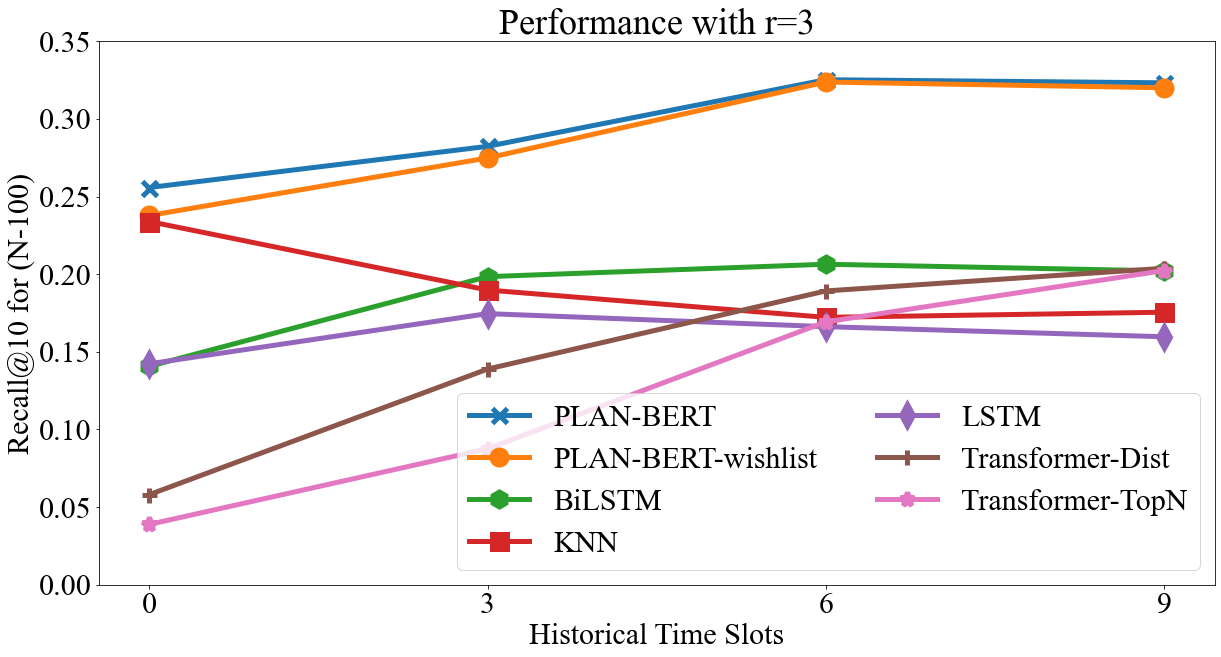

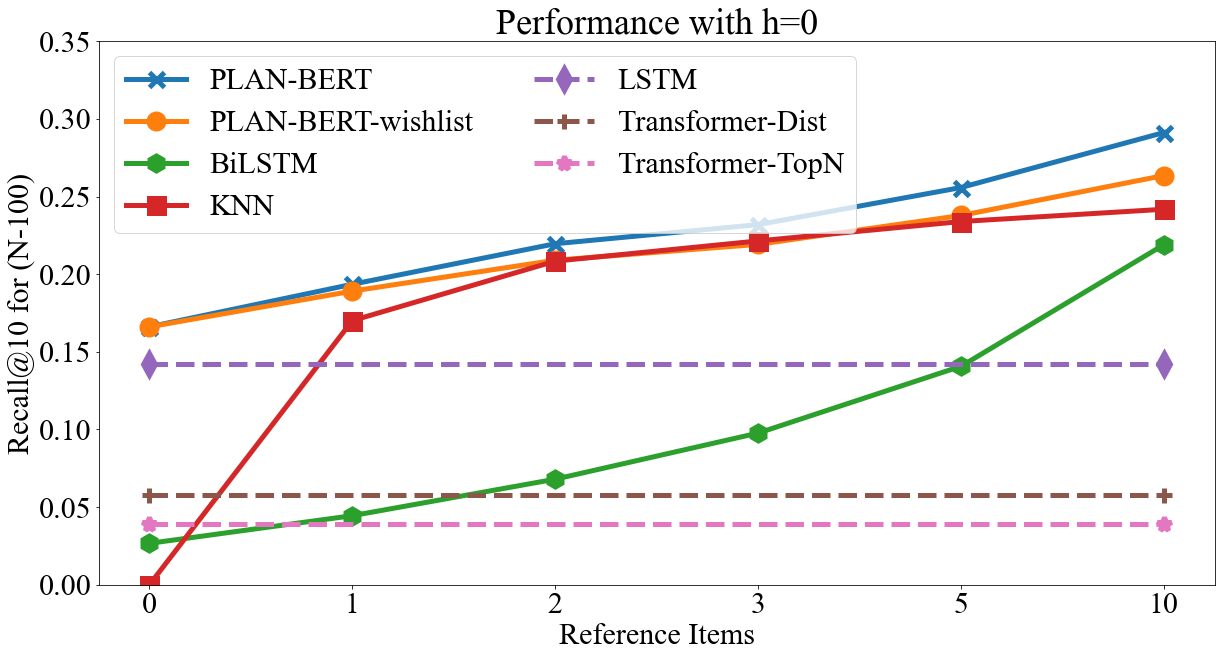

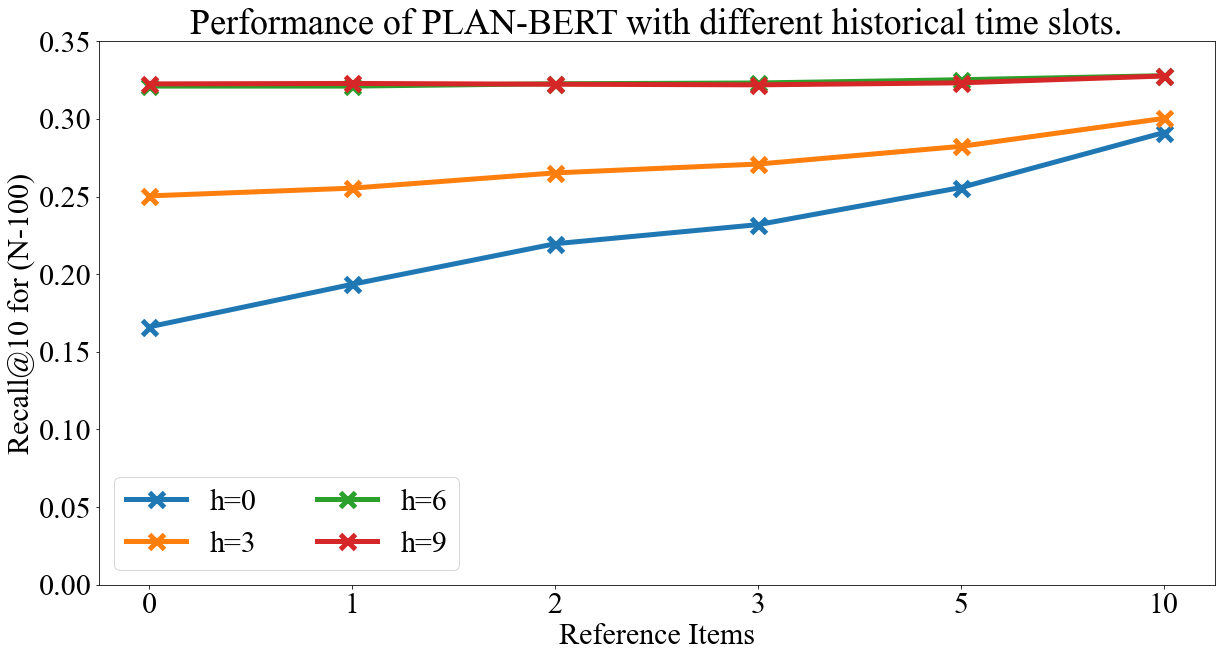

In [68]:
# Checkin

PLANBERT = '''0.1661	0.1935	0.2196	0.2319	0.2558	0.2912
0.2504	0.2554	0.2652	0.2709	0.2823	0.3003
0.3211	0.3211	0.3226	0.3231	0.3252	0.3278
0.3225	0.3228	0.3223	0.3219	0.3232	0.3276'''
PLANBERT_wishlist = '''0.1661	0.1891	0.209	0.2192	0.2378	0.2635
0.2504	0.254	0.2634	0.2672	0.2748	0.2898
0.3211	0.3223	0.3253	0.3251	0.3237	0.3276
0.3225	0.3224	0.3209	0.3204	0.32	0.3189'''
BiLSTM = '''0.0267	0.0445	0.068	0.0977	0.1407	0.219
0.1407	0.155	0.1646	0.1736	0.1984	0.2262
0.1801	0.1864	0.19	0.1936	0.2064	0.2215
0.1992	0.1993	0.1999	0.2001	0.2021	0.204'''
KNN = '''0	0.1701	0.2084	0.2214	0.2339	0.2418
0.1722	0.1768	0.1798	0.1827	0.1898	0.1993
0.1639	0.1659	0.1669	0.168	0.1722	0.1775
0.1738	0.1743	0.1744	0.1743	0.1755	0.1781'''
LSTM = '''0.1423
0.1746
0.1662
0.1597'''
ARDist = '''0.0581
0.1389
0.1892
0.2038'''
ARTopN = '''0.0389
0.0876
0.1693
0.2023'''

r_list = [0,1,2,3,5,10]
h_list = [0,3,6,9]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
ARTopN = np.array([[float(y) for y in x.split('\t')] for x in ARTopN.split('\n')])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with r=3')
ax = fig.add_subplot(111)

ax.plot(PLANBERT[:, 4], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[:, 4], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[:, 4], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[:, 4], marker='s', linestyle='-', **plot_dict)
ax.plot(LSTM, marker='d', linestyle='-', **plot_dict)
ax.plot(ARDist, marker='+', linestyle='-', **plot_dict)
ax.plot(ARTopN, marker='*', linestyle='-', **plot_dict)
    
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Historical Time Slots')

ax.xaxis.set_ticks(np.arange(PLANBERT.shape[0]))
ax.xaxis.set_ticklabels(h_list, fontsize=30)

ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.35])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(PLANBERT[0], marker='x', linestyle='-', **plot_dict)
ax.plot(PLANBERT_wishlist[0], marker='o', linestyle='-', **plot_dict)
ax.plot(BiLSTM[0], marker='h', linestyle='-', **plot_dict)
ax.plot(KNN[0], marker='s', linestyle='-', **plot_dict)
ax.plot([0,len(r_list)-1], [LSTM[0], LSTM[0]], marker='d', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARDist[0], ARDist[0]], marker='+', linestyle='--', **plot_dict)
ax.plot([0,len(r_list)-1], [ARTopN[0], ARTopN[0]], marker='*', linestyle='--', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN', 'LSTM', 'Transformer-Dist', 'Transformer-TopN'], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.35])

fig = plt.figure(figsize=(20, 10))
plt.title('Performance of PLAN-BERT with different historical time slots.')
ax = fig.add_subplot(111)
for line in PLANBERT[:8]:
    ax.plot(line, marker='x', linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-100)')
plt.xlabel('Reference Items')
ax.xaxis.set_ticks(np.arange(PLANBERT.shape[1]))
ax.xaxis.set_ticklabels(r_list, fontsize=30)
ax.legend(['h={}'.format(iter) for iter in h_list[:8]], fontsize=30,  ncol=2, loc='best')
plt.ylim([0.00, 0.35])

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


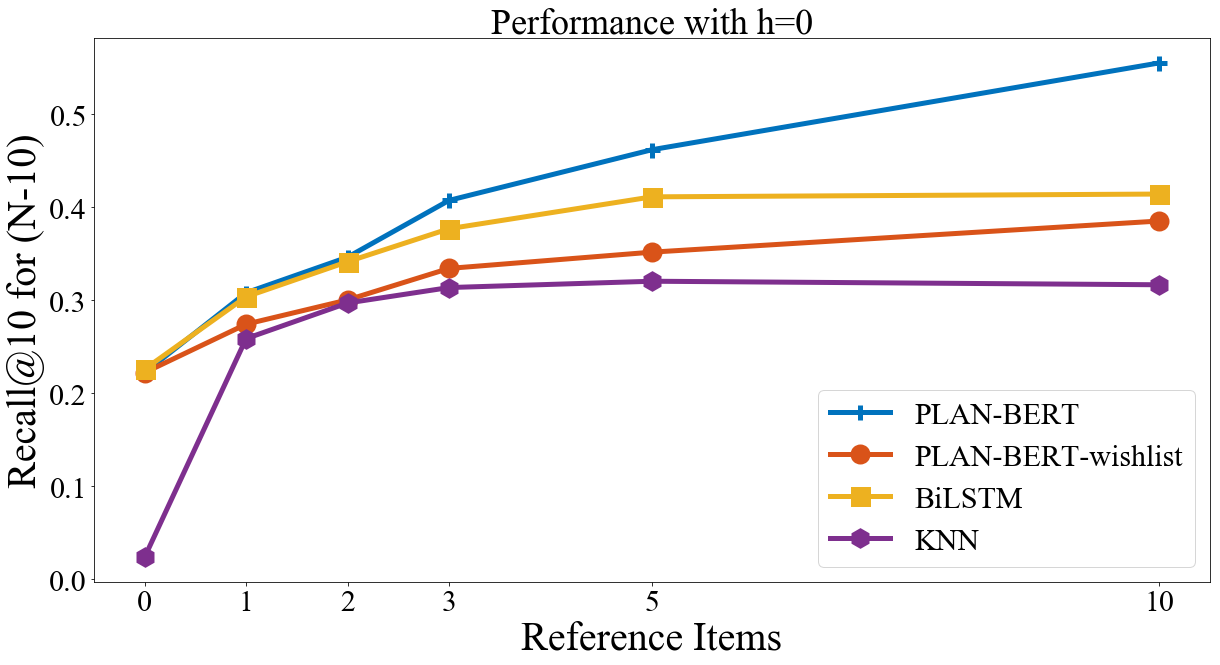

In [83]:
# Checkin

PLANBERT = '''0.2221	0.308	0.3463	0.4074	0.4619	0.5553
0.3797	0.4069	0.4132	0.4348	0.4748	0.5034'''
PLANBERT_wishlist = '''0.2221	0.2742	0.3003	0.3342	0.3517	0.3852
0.3797	0.3969	0.42	0.4322	0.4512	0.4647'''
BiLSTM = '''0.2258	0.3037	0.3414	0.3769	0.4112	0.4142
0.3549	0.3674	0.3644	0.3774	0.3888	0.4215'''
KNN = '''0.0236	0.2587	0.297	0.3136	0.3204	0.3166
0.2523	0.2514	0.2549	0.2547	0.26	0.2747'''
LSTM = '''0.2603
0.3452'''
ARDist = '''0.2514
0.3676'''
ARTopN = '''0.1376
0.3615'''

r_list = [0,1,2,3,5,10]
h_list = [0,3]

PLANBERT = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT.split('\n')])
PLANBERT_wishlist = np.array([[float(y) for y in x.split('\t')] for x in PLANBERT_wishlist.split('\n')])
BiLSTM = np.array([[float(y) for y in x.split('\t')] for x in BiLSTM.split('\n')])
KNN = np.array([[float(y) for y in x.split('\t')] for x in KNN.split('\n')])
LSTM = np.array([[float(y) for y in x.split('\t')] for x in LSTM.split('\n')])
ARDist = np.array([[float(y) for y in x.split('\t')] for x in ARDist.split('\n')])
c = sns.color_palette("cubehelix", PLANBERT.shape[0])


fig = plt.figure(figsize=(20, 10))
plt.title('Performance with h=0')
ax = fig.add_subplot(111)
ax.plot(r_list, PLANBERT[0], marker=m[0], c=c2[0], linestyle='-', **plot_dict)
ax.plot(r_list, PLANBERT_wishlist[0], marker=m[1], c=c2[1], linestyle='-', **plot_dict)
ax.plot(r_list, BiLSTM[0], marker=m[2], c=c2[2], linestyle='-', **plot_dict)
ax.plot(r_list, KNN[0], marker=m[3], c=c2[3], linestyle='-', **plot_dict)
plt.ylabel('Recall@10 for (N-10)', fontsize=label_fontsize)
plt.xlabel('Reference Items', fontsize=label_fontsize)
ax.xaxis.set_ticks(r_list)
ax.xaxis.set_ticklabels(r_list, fontsize=fontsize)
ax.legend(['PLAN-BERT', 'PLAN-BERT-wishlist', 'BiLSTM', 'KNN'], fontsize=30,  ncol=1, loc='best')
#plt.ylim([-0.02, 0.45])